# Data Acquisition and Normalization

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download daily closing prices for AAPL
data = yf.download('AAPL', start='2015-01-01', end='2025-01-01')
data = data[['Close']]

# Normalize using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

print(data.tail())


[*********************100%***********************]  1 of 1 completed

Price          Close
Ticker          AAPL
Date                
2024-12-24  0.996559
2024-12-26  1.000000
2024-12-27  0.985608
2024-12-30  0.971383
2024-12-31  0.963915


# Temporal Feature Engineering

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 50
X, y = create_sequences(data['Close'].values, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Partition data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# RNN Architecture and Implementation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define a basic RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Model training
rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


# LSTM Architecture and Implementation

In [13]:
from tensorflow.keras.layers import LSTM

# Define an LSTM-based sequence model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0317 - val_loss: 0.0035
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.4549e-04 - val_loss: 0.0012
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6654e-04 - val_loss: 0.0014
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2050e-04 - val_loss: 9.7377e-04
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2901e-04 - val_loss: 8.4065e-04
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8610e-04 - val_loss: 8.5439e-04
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9539e-04 - val_loss: 7.9867e-04
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0265e-04 - val_loss: 7.3841e-04
Epoch 9/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7862e-04 - val_loss: 9.1761e-04
Epoch 10/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8750e-04 - val_loss: 7.5812e-04
Epoch 11/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.6792e-04 - val_loss: 6.

# Forecasting and Comparative Evaluation

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


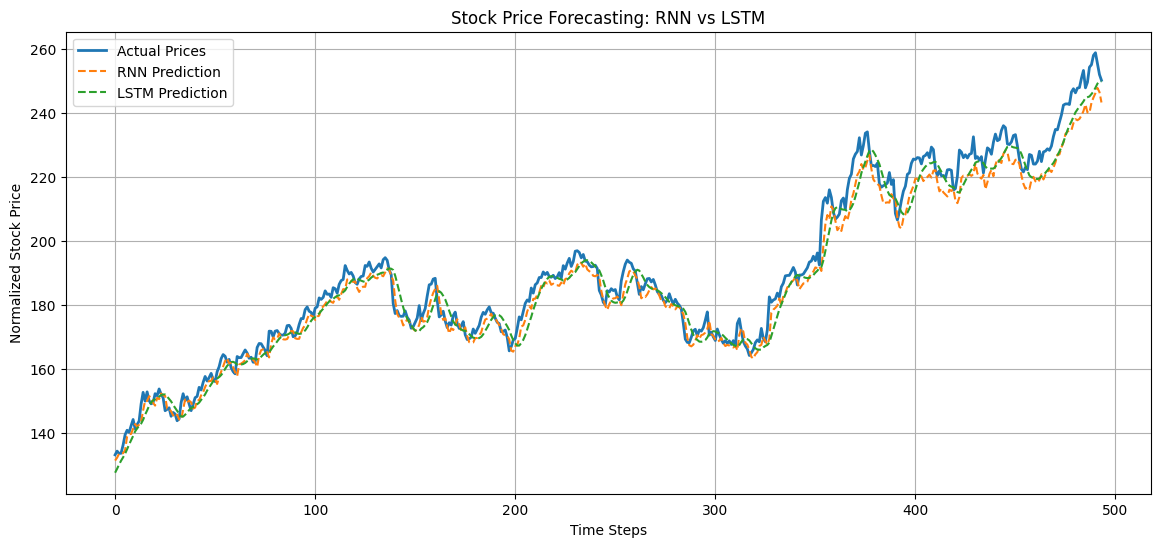

In [16]:
# Generate out-of-sample predictions
rnn_preds = rnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)

# Invert normalization for interpretability
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
rnn_preds_actual = scaler.inverse_transform(rnn_preds)
lstm_preds_actual = scaler.inverse_transform(lstm_preds)

# Comparative visualization
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Prices', linewidth=2)
plt.plot(rnn_preds_actual, label='RNN Prediction', linestyle='--')
plt.plot(lstm_preds_actual, label='LSTM Prediction', linestyle='--')
plt.title('Stock Price Forecasting: RNN vs LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Stock Price')
plt.legend()
plt.grid(True)
plt.show()
